In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [39]:
def prediction(X_test, model):
  
    # Predicton on test with giniIndex
    y_pred = model.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))



In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
legit_sample = legit.sample(n=492)

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183775,125946.0,1.894845,0.400503,-0.623102,3.760542,0.418072,0.362404,0.003171,0.073337,-0.824998,...,0.101455,0.434630,0.036094,-0.348242,0.135874,0.098847,-0.032164,-0.065127,3.94,0
235474,148402.0,-1.303719,1.105589,-3.379120,-0.383921,0.847778,1.403939,-0.032561,-1.787864,-1.020774,...,-0.554459,2.550605,-0.325024,-1.667217,-1.654295,-0.054046,0.206256,0.047341,233.29,0
217139,140779.0,2.298726,-0.526005,-2.416423,-0.816060,-0.039191,-2.002989,0.392849,-0.630853,-0.803751,...,0.458144,1.340579,-0.206379,0.104557,0.708039,0.303290,-0.105867,-0.096775,10.00,0
263617,161037.0,-1.635259,0.564505,0.620218,-0.847896,-0.067941,-0.949205,0.343988,0.333626,0.375197,...,0.250090,0.740082,-0.117777,-0.022149,0.045892,0.256040,-0.179785,0.014449,65.17,0
79052,57840.0,-3.054454,-1.934442,1.858210,0.056804,-1.113897,0.014330,1.113130,-0.424316,0.624610,...,-0.019172,1.050340,0.402561,0.607773,-0.142807,0.364651,-0.553667,0.740605,370.80,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [1]:
new_dataset['Class'].value_counts()

NameError: name 'new_dataset' is not defined

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91156.577236,-0.024417,0.154658,0.063488,0.029331,0.088488,0.002652,0.053196,0.003569,-0.062959,...,0.006666,0.035778,-0.012205,0.008194,0.008172,0.016991,0.035405,0.004691,0.006345,78.423333
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(new_dataset.drop('Time',axis=1)))
MinMaxScaler()
print(scaler.data_max_)

print(scaler.transform(new_dataset.drop('Time',axis=1)))
new_dataset1 = new_dataset.drop('Time',axis=1)

MinMaxScaler()
[2.30991657e+00 2.20577290e+01 3.17428613e+00 1.21146718e+01
 1.16595180e+01 6.47411463e+00 5.80253735e+00 2.00072084e+01
 4.65268593e+00 7.81646850e+00 1.20189132e+01 3.21837111e+00
 3.16668585e+00 3.95167501e+00 2.52311989e+00 3.13965566e+00
 6.73938438e+00 3.79031621e+00 5.22834179e+00 1.10590043e+01
 2.72028392e+01 8.36198519e+00 5.46622995e+00 1.40584505e+00
 2.20820918e+00 3.04080820e+00 3.05235769e+00 1.77955368e+00
 2.12587000e+03 1.00000000e+00]
[[0.98736937 0.36197848 0.88921783 ... 0.4944479  0.00185336 0.        ]
 [0.89003703 0.38275032 0.80881582 ... 0.52527073 0.1097386  0.        ]
 [0.99965947 0.33468358 0.83690082 ... 0.4857745  0.00470396 0.        ]
 ...
 [0.90913419 0.3833624  0.84281492 ... 0.56556319 0.03663912 1.        ]
 [0.83495529 0.36743923 0.74986803 ... 0.44276765 0.11524693 1.        ]
 [0.99032507 0.35484838 0.83202837 ... 0.50810108 0.02000593 1.        ]]


In [20]:
X = new_dataset1.drop(columns='Class', axis=1)
Y = new_dataset1['Class']

In [21]:
print(Y)

183775    0
235474    0
217139    0
263617    0
79052     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (787, 29) (197, 29)


In [24]:
# modelevalution

# Logistic Regression

In [25]:
model1 = LogisticRegression()

In [26]:
model1.fit(X_train, Y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# accuracy on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [52]:
X_test_prediction = model1.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
print('Accuracy score on Test Data : ', testing_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [55]:
yp_logistic = model1.predict(X_test)

In [57]:
yp_logistic

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [58]:
Y_test

247995    1
128795    0
3287      0
10950     0
15451     1
         ..
108258    1
12108     1
99506     1
74496     1
197034    0
Name: Class, Length: 197, dtype: int64

# Artificial Neural Networks

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(29,),activation = 'relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 3.8429 - accuracy: 0.4485
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1.0301 - accuracy: 0.5604
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.6658
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7281
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7764
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8196
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8386
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8831
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8895
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8945
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9759
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9682
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9708
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9708
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9708
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9695
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9695
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9746
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9759
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9733
Epoch 93/100


In [30]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9137


[0.2436724603176117, 0.913705587387085]

In [31]:
yp = model.predict(X_test)
yp[:5]

7/7 [==============================] - 0s 4ms/step


array([[0.9999806 ],
       [0.00712078],
       [0.00593789],
       [0.00551774],
       [1.        ]], dtype=float32)

In [60]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [61]:
y_pred[:10]

[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]

In [62]:
testing_data_accuracy_nn = accuracy_score(y_pred, Y_test)

In [34]:
Y_test[:10]

C:\Users\Dell\AppData\Local\Temp\ipykernel_15032\418425187.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_test[:10]


247995    1
128795    0
3287      0
10950     0
15451     1
133903    0
10204     1
151011    1
97985     0
42784     1
Name: Class, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        99
           1       0.96      0.87      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



Text(69.0, 0.5, 'Truth')

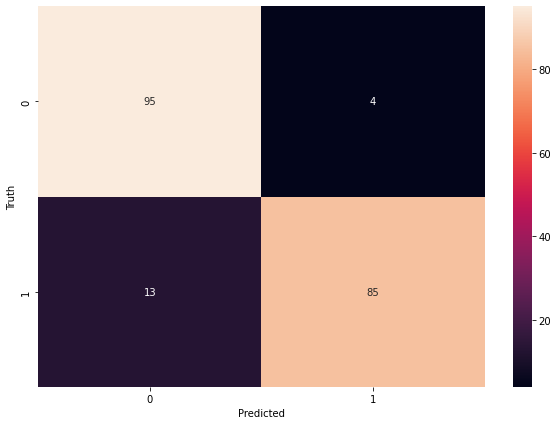

In [36]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions =y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [40]:
clf_gini = train_using_gini(X_train, X_test, Y_train)
clf_entropy = train_using_entropy(X_train, X_test, Y_train)

In [41]:
print("Results Using Gini Index:")
      
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(Y_test, y_pred_gini)
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(Y_test, y_pred_entropy)
      

Results Using Gini Index:
Predicted values:
[1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0]
Confusion Matrix:  [[94  5]
 [12 86]]
Accuracy :  91.37055837563452
Report :                precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

Results Using Entropy:
Predicted values:
[1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0

# Support Vector Machine

In [42]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [43]:
X_train_prediction_svm = clf.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

In [44]:
print(f'accuracy score: {training_data_accuracy_svm}')

accuracy score: 0.9504447268106735


In [45]:
y_pred_svc = clf.predict(X_test)
print( cal_accuracy(Y_test, y_pred_svc))

Confusion Matrix:  [[96  3]
 [13 85]]
Accuracy :  91.87817258883248
Report :                precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

None


# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB


In [47]:
gnb = GaussianNB()

In [48]:
y_pred_nb = gnb.fit(X_train, Y_train).predict(X_test)

In [49]:
print( cal_accuracy(Y_test, y_pred_nb))

Confusion Matrix:  [[95  4]
 [16 82]]
Accuracy :  89.84771573604061
Report :                precision    recall  f1-score   support

           0       0.86      0.96      0.90        99
           1       0.95      0.84      0.89        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

None


In [67]:
print(f"Accuracy score by different models are :\n Logistic Regression: {accuracy_score(yp_logistic, Y_test)*100}\n Neural networks {testing_data_accuracy_nn*100} \n Decision Trees: {accuracy_score(Y_test,y_pred_entropy)} \n Support Vector Machine: {accuracy_score(Y_test, y_pred_svc)} \n Naive_Bayes: {accuracy_score(Y_test, y_pred_nb)}")

Accuracy score by different models are :
 Logistic Regression: 91.87817258883248
 Neural networks 0.9137055837563451 
 Decision Trees: 0.9187817258883249 
 Support Vector Machine: 0.9187817258883249 
 Naive_Bayes: 0.8984771573604061
